In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess


class Moviespider(scrapy.Spider):    
    name = "IMDB"
    
    # URL(s) to start with.
    start_urls = [
        'https://www.imdb.com/list/ls053061406/',
        'https://www.imdb.com/list/ls003518637/'
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        for movie in response.xpath('//*[@id="main"]'):
            yield{
                "movie":  movie.xpath('.//h3[@class="lister-item-header"]/a//text()').extract(),
                "runtime": movie.xpath('.//span[@class="runtime"]//text()').extract(),
                "rating": movie.xpath('.//span[@class="ipl-rating-star__rating"]//text()').extract()
                
                }
            

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'movie_data.json',  # Name our storage file.
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(Moviespider)
process.start()
print('Success!')


Success!


In [7]:
import pandas as pd

movie_data = pd.read_json('movie_data.json')
print(movie_data.shape)
print(movie_data)

(2, 3)
                                               movie  \
0  [Terminator 2: Judgment Day, The Terminator, T...   
1  [Die Hard, Pulp Fiction, Twelve Monkeys, The F...   

                                              rating  \
0  [8.5, 0, Rate, 1, Rate, 2, Rate, 3, Rate, 4, R...   
1  [8.2, 0, Rate, 1, Rate, 2, Rate, 3, Rate, 4, R...   

                                             runtime  
0  [137 min, 107 min, 141 min, 113 min, 107 min, ...  
1  [132 min, 154 min, 129 min, 126 min, 128 min, ...  


In [8]:
movie_data.rating[0][:12]

['8.5', '0', 'Rate', '1', 'Rate', '2', 'Rate', '3', 'Rate', '4', 'Rate', '5']

In [28]:
# filtering out only the relevant ratings
Arnold_rating = movie_data.rating[0]
Arnold_rating = [Arnold_rating[i] for i in range (len(Arnold_rating)) if i % 23 == 0]
bruce_rating = movie_data.rating[1]
bruce_rating = [bruce_rating[i] for i in range (len(bruce_rating)) if i % 23 == 0]    

In [29]:
A_movie_df = pd.DataFrame()
B_movie_df = pd.DataFrame()

In [30]:
# unpack single row of data into dataframe columns
A_movie_df['movie'] = movie_data.movie[0]
A_movie_df['runtime'] = movie_data.runtime[0]
A_movie_df.loc[:,'actor'] = "A.Schwarzenegger"  
A_movie_df['rating'] = pd.to_numeric(Arnold_rating)



In [31]:
# unpack single row of data into dataframe columns
 
B_movie_df['movie'] = movie_data.movie[1]
B_movie_df['runtime'] = movie_data.runtime[1]
B_movie_df['rating'] = pd.to_numeric(bruce_rating)
B_movie_df.loc[:,'actor'] = "B.Willis"  


In [32]:
# joining the two dataframes
movie_df = pd.concat([A_movie_df, B_movie_df],sort=False)
movie_df

,movie,runtime,actor,rating
0,Terminator 2: Judgment Day,137 min,A.Schwarzenegger,8.5
1,The Terminator,107 min,A.Schwarzenegger,8.0
2,True Lies,141 min,A.Schwarzenegger,7.2
3,Total Recall,113 min,A.Schwarzenegger,7.5
4,Predator,107 min,A.Schwarzenegger,7.8
5,Commando,90 min,A.Schwarzenegger,6.7
6,Conan the Barbarian,129 min,A.Schwarzenegger,6.9
7,The Running Man,101 min,A.Schwarzenegger,6.7
8,Last Action Hero,130 min,A.Schwarzenegger,6.4
9,Terminator 3: Rise of the Machines,109 min,A.Schwarzenegger,6.3


In [33]:
movie_df.index = range(len(movie_df))

In [34]:
movie_df.runtime = pd.to_numeric(movie_df.runtime.str.replace("min",""))

In [35]:
movie_df.groupby('actor').describe().T

actor          A.Schwarzenegger    B.Willis
rating  count         25.000000   25.000000
        mean           6.128000    7.144000
        std            1.199486    0.817048
        min            3.300000    5.600000
        25%            5.600000    6.600000
        50%            6.100000    7.100000
        75%            6.700000    7.700000
        max            8.500000    8.900000
runtime count         25.000000   25.000000
        mean         110.720000  115.640000
        std           14.336783   15.926602
        min           89.000000   93.000000
        25%          103.000000  105.000000
        50%          108.000000  111.000000
        75%          122.000000  126.000000
        max          141.000000  154.000000

It looks like Bruce's top movies had a higher average rating than Arnold's.

In [36]:
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

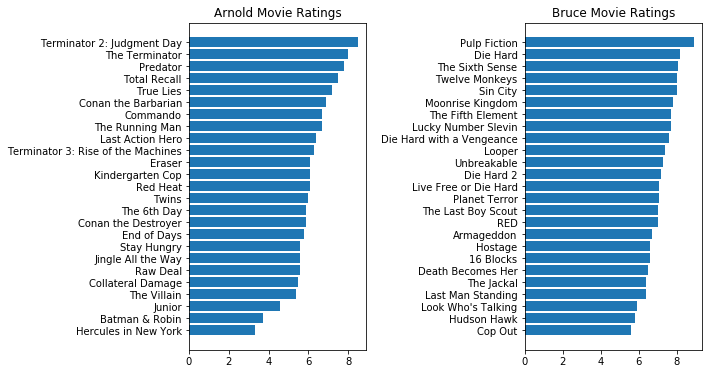

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.barh(A.sort_values(by='rating',ascending=True).movie,A.rating.sort_values(ascending=True))
plt.title("Arnold Movie Ratings")

plt.subplot(222)
plt.barh(B.sort_values(by='rating',ascending=True).movie,B.rating.sort_values(ascending=True))
plt.title("Bruce Movie Ratings")
plt.tight_layout()
plt.show()


The sequel to Terminator did slightly better that the original most likely due to the advanced special effect used to create Terminator 2. However the sequal to Die Hard did significantly worse than the original.

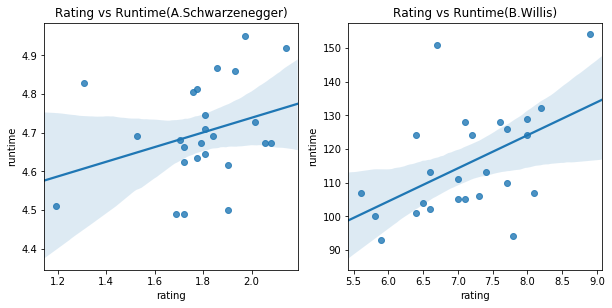

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(221)
A = movie_df[movie_df.actor=='A.Schwarzenegger']
sns.regplot(A.rating,A.runtime)
plt.title('Rating vs Runtime(A.Schwarzenegger)')
plt.subplot(222)
B = movie_df[movie_df.actor=='B.Willis']
sns.regplot(B.rating,B.runtime)
plt.title('Rating vs Runtime(B.Willis)')
plt.show()

For both movies it looks like there is a positive correlation between runtime and rating for the top movies of both actors. 

## Write up.

For this challenge I wanted to scape data from IMDB on the top 25 movies that Arnold Schwarzenegger and Bruce Willis played in. I first searched the Imdb site for the top 25 actors of each movie. I then set those two URLs into the "start_urls" variable in the spider function that I created for the use of Scrapy. Next I went to the first movie in the list and right clicked on the section that I wanted to scrape, the movie title, and scrolled to inspect. It brought up the section of HTML code that the target was in. This gave the location for the specific section I wanted and I could right click on that and get the xpath to that location. But since I wanted all 25 movies for the page I had to modify the xpath to generlize the section of HTML for each title. I had to do some digging on xpath language since I had never used it before but after some trial and error I figured it out. I did the same for "rating" and for "runtime". 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Scrapy put this data into a .json file and I used pandas to upload that data into a data frame. Unfortunaltely it put all of the data that I wanted in a whole column into on row for each actor and a column for each search. There is probably a way to get the data into the proper form in a scrapy setting or code but I will have to do more research on the subject. I wrangled the data into a sutable data frame and came up with the analysis you see above. 